In [ ]:
# Mengimport library yang diperlukan
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Membaca data dari file CSV
data = pd.read_csv("user_data.csv")

# Memisahkan fitur dan label dari data
X = data.drop('finished_on_time', axis=1)
y = data['finished_on_time']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Membangun model decision tree
clf = DecisionTreeClassifier()

# Melatih model dengan data latih
clf.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = clf.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi model:", accuracy)

# Contoh data baru untuk prediksi
user_1 = pd.DataFrame({'avg_course_time': [1800], 'avg_quiz_time': [600]})
user_2 = pd.DataFrame({'avg_course_time': [3000], 'avg_quiz_time': [800]})

# Membuat prediksi terhadap data baru
pred_1 = clf.predict(user_1)
pred_2 = clf.predict(user_2)

# Menampilkan prediksi
print('Predictions for user 1:', pred_1)
print('Predictions for user 2:', pred_2)


Akurasi model: 0.75
Predictions for user 1: [1]
Predictions for user 2: [0]


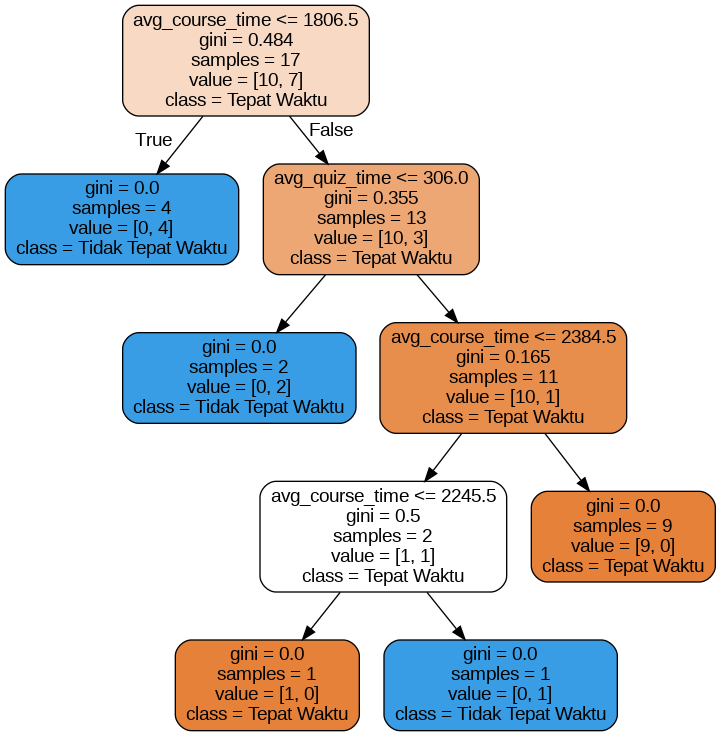

In [ ]:
# Mengimport library yang diperlukan
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Memvisualisasikan decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['Tepat Waktu', 'Tidak Tepat Waktu'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('decision_tree')

# Menampilkan visualisasi decision tree
Image(filename='decision_tree.png')
